# Plotting output of sensor test

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import os
import itertools
sns.set()

Define input file name (slightly cleaned up manually: missing values removed) and check if it exists.

In [3]:
infn = "../data/input_for_plot/tempsensors_cleaned.dat"

In [4]:
os.path.exists(infn)

True

Read data into a pandas dataframe.

In [5]:
data = pd.read_csv(infn, delimiter='\t')
data_allT = data[['time_AKDT', 'DHT11_T', 'SHT31_T', 'P36_T']].melt(
    'time_AKDT', var_name='sensor', value_name='T_Celsius')

In [11]:
data['time'] = pd.to_datetime(data['time_AKDT'], format='%Y%m%d_%H%M%S')

In [8]:
data.columns = ['time_AKDT', 'DHT11 Temp C', 'DHT11 %RH', 
                'TMP36 Temp C', 'SHT31 Temp C', 'SHT31 %RH']

In [21]:
data.head()

,time_AKDT,DHT11 Temp C,DHT11 %RH,TMP36 Temp C,SHT31 Temp C,SHT31 %RH,time
0,20181209_040401,22.0,14,25.11,22.68,18.61,2018-12-09 04:04:01
1,20181209_040412,22.0,14,24.54,22.72,18.36,2018-12-09 04:04:12
2,20181209_040422,22.0,14,25.51,22.68,18.15,2018-12-09 04:04:22
3,20181209_040432,22.0,14,24.46,22.62,18.11,2018-12-09 04:04:32
4,20181209_040443,22.0,13,25.11,22.58,18.24,2018-12-09 04:04:43


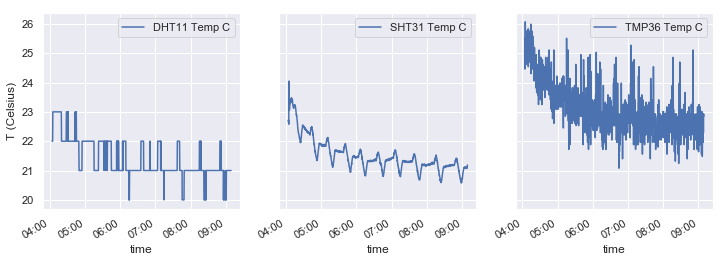

In [12]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

data[['time', 'DHT11 Temp C']].set_index('time').plot(ax=ax1)
data[['time', 'SHT31 Temp C']].set_index('time').plot(ax=ax2)
data[['time', 'TMP36 Temp C']].set_index('time').plot(ax=ax3)
ax1.set_ylabel('T (Celsius)')
for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))


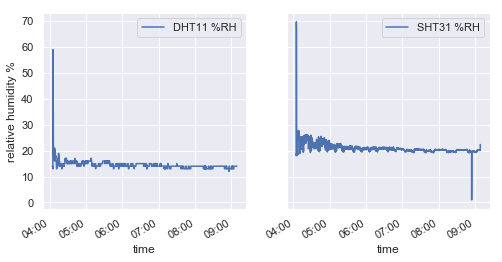

In [15]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(8, 4))

data[['time', 'DHT11 %RH']].set_index('time').plot(ax=ax1)
data[['time', 'SHT31 %RH']].set_index('time').plot(ax=ax2)
ax1.set_ylabel('relative humidity %')
for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))


(19, 27)

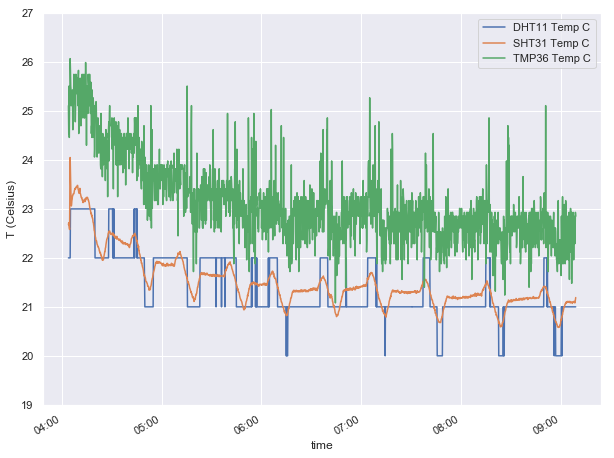

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 8))

data[['time', 'DHT11 Temp C', 'SHT31 Temp C', 'TMP36 Temp C']].set_index('time').plot(ax=ax)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.set_ylabel('T (Celsius)')
ax.set_ylim((19, 27))

(0, 27)

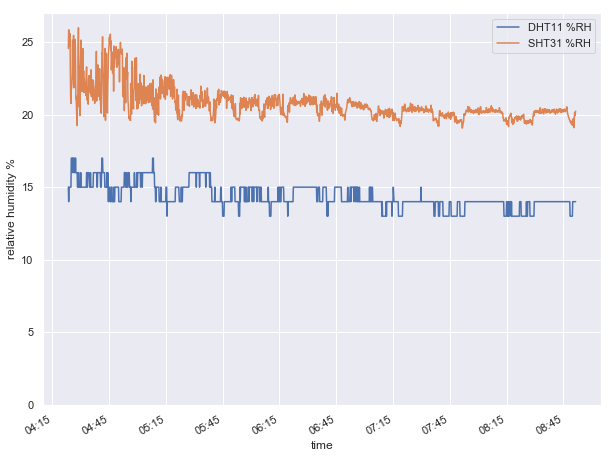

In [38]:
fig, ax = plt.subplots(1, figsize=(10, 8))

data[110:-100][['time', 'DHT11 %RH', 'SHT31 %RH']].set_index('time').plot(ax=ax)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.set_ylabel('relative humidity %')
ax.set_ylim((0, 27))

Text(0,0.5,'relative humidity %')

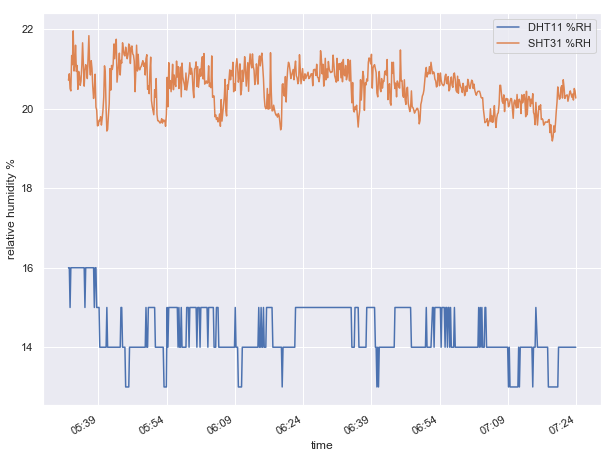

In [45]:
fig, ax = plt.subplots(1, figsize=(10, 8))

data[500:-600][['time', 'DHT11 %RH', 'SHT31 %RH']].set_index('time').plot(ax=ax)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.set_ylabel('relative humidity %')

In [33]:
data[140:-100]

,time_AKDT,DHT11 Temp C,DHT11 %RH,TMP36 Temp C,SHT31 Temp C,SHT31 %RH,time
140,20181209_042848,23.0,16,25.11,22.55,25.99,2018-12-09 04:28:48
141,20181209_042858,23.0,16,24.86,22.51,22.17,2018-12-09 04:28:58
142,20181209_042909,23.0,15,24.70,22.51,23.35,2018-12-09 04:29:09
143,20181209_042919,23.0,15,24.70,22.50,20.49,2018-12-09 04:29:19
144,20181209_042929,23.0,15,24.70,22.48,21.13,2018-12-09 04:29:29
145,20181209_042940,23.0,15,24.70,22.48,19.94,2018-12-09 04:29:40
146,20181209_042950,23.0,15,24.70,22.48,23.68,2018-12-09 04:29:50
147,20181209_043000,23.0,16,24.46,22.50,24.40,2018-12-09 04:30:00
148,20181209_043011,23.0,15,24.86,22.50,25.14,2018-12-09 04:30:11
149,20181209_043021,23.0,15,24.22,22.50,23.56,2018-12-09 04:30:21


In [50]:
data.time.iloc[0]

Timestamp('2018-12-09 04:04:01')